#Lectura y procesamiento de los resultados de los mejores modelos SVR

En el presente archivo se leen los archivos excel que contienen resumenes de los modelos generados con las grillas de SVR. Se procesa dicha información para encontrar los mejores modelos.

In [1]:
pip install -U scikit-learn

     |████████████████████████████████| 22.3MB 1.6MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [2]:
# Access files from your Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
cd gdrive/MyDrive/Universidad/2020/Tesis_final/Codigos/leer_procesar_modelos_NARMAX/svr/

/content/gdrive/MyDrive/Universidad/2020/Tesis_final/Codigos/leer_procesar_modelos_NARMAX/svr


In [4]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from joblib import dump, load

summaryModelsSVR2S = pd.read_excel('grilla_SVR_NARMAX_2STEPS.xlsx', header=0)
summaryModelsSVR4S = pd.read_excel('grilla_SVR_NARMAX_4STEPS.xlsx', header=0)
summaryModelsSVR8S = pd.read_excel('grilla_SVR_NARMAX_8STEPS.xlsx', header=0)
summaryModelsSVR16Sv1 = pd.read_excel('grilla_SVR_NARMAX_16STEPS_v1.xlsx', header=0)
summaryModelsSVR16Sv2 = pd.read_excel('grilla_SVR_NARMAX_16STEPS_v2.xlsx', header=0)
summaryModelsSVR16Sv3 = pd.read_excel('grilla_SVR_NARMAX_16STEPS_v3.xlsx', header=0)


grilla_SVR_NARMAX_AQP = pd.concat([summaryModelsSVR2S, summaryModelsSVR4S], ignore_index=True)
grilla_SVR_NARMAX_AQP = pd.concat([grilla_SVR_NARMAX_AQP, summaryModelsSVR8S], ignore_index=True)
grilla_SVR_NARMAX_AQP = pd.concat([grilla_SVR_NARMAX_AQP, summaryModelsSVR16Sv1], ignore_index=True)
grilla_SVR_NARMAX_AQP = pd.concat([grilla_SVR_NARMAX_AQP, summaryModelsSVR16Sv2], ignore_index=True)
grilla_SVR_NARMAX_AQP = pd.concat([grilla_SVR_NARMAX_AQP, summaryModelsSVR16Sv3], ignore_index=True)

grilla_SVR_NARMAX_AQP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MAE                     960 non-null    float64
 1   delayedSteps            960 non-null    int64  
 2   nameModel               960 non-null    object 
 3   nameConfiguration       960 non-null    object 
 4   timeTrain (in seconds)  960 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 37.6+ KB


##La cantidad de modelos generados para el SVR NARMAX de AQP fue de 960

In [5]:
rslt_df = grilla_SVR_NARMAX_AQP.sort_values('MAE')
total = grilla_SVR_NARMAX_AQP['timeTrain (in seconds)'].sum()
print("Total time: " + str(total))
grilla_SVR_NARMAX_AQP.describe()

Total time: 173545.03000000003


MAE  delayedSteps  timeTrain (in seconds)
count  960.000000    960.000000              960.000000
mean     8.042983      7.500000              180.776073
std     16.422604      5.364697              563.704665
min      0.282886      2.000000                1.620000
25%      0.334039      3.500000               17.957500
50%      0.417454      6.000000               42.035000
75%      1.561274     10.000000               97.505000
max     68.514871     16.000000             6996.930000

##La cantidad de segundos totales para ejecutar la grilla es aproximadamente 173545, lo que equivale a 48 horas aproximadamente. Además se tienen las estadisticas resumen.

In [5]:
rslt_df.iloc[:43,:]

MAE  ...  timeTrain (in seconds)
730  0.282886  ...                   86.41
735  0.282908  ...                   87.00
731  0.287961  ...                   82.19
736  0.288131  ...                   83.07
660  0.289215  ...                  371.24
690  0.289215  ...                  369.55
666  0.289322  ...                  864.76
696  0.289322  ...                  874.94
702  0.289364  ...                 1420.80
672  0.289364  ...                 1475.73
678  0.289377  ...                 2212.30
708  0.289377  ...                 2216.76
684  0.289380  ...                 2681.01
714  0.289380  ...                 2687.24
570  0.289957  ...                   75.73
540  0.290100  ...                   75.28
790  0.291176  ...                   50.74
780  0.291628  ...                   46.53
576  0.292099  ...                   74.55
546  0.292481  ...                   73.01
737  0.292614  ...                   81.24
750  0.293080  ...                  661.94
755  0.293080  ...                  680.31
732  0.293089  ...                   81.04
752  0.293199  ...                 3258.25
757  0.293199  ...                 3235.59
751  0.293244  ...                 1894.68
756  0.293244  ...                 1949.66
753  0.293292  ...                 5433.10
758  0.293292  ...                 5546.97
661  0.293370  ...                  185.64
691  0.293370  ...                  186.45
754  0.293385  ...                 6912.71
759  0.293385  ...                 6996.93
673  0.293536  ...                  714.28
703  0.293536  ...                  720.45
697  0.293546  ...                  453.24
667  0.293546  ...                  447.83
715  0.293563  ...                 1423.99
685  0.293563  ...                 1422.28
709  0.293576  ...                 1074.75
679  0.293576  ...                 1068.33
571  0.293745  ...                   44.80

[43 rows x 5 columns]

In [6]:
rslt_df.iloc[0,:]

MAE                                                                0.282886
delayedSteps                                                             16
nameModel                    results/SVR_752_1_rbf_scale_0.1_0.1_16S.joblib
nameConfiguration         results/SVR_752_1_rbf_scale_0.1_0.1_16S_config...
timeTrain (in seconds)                                                86.41
Name: 730, dtype: object

In [7]:
bestModel = rslt_df.iloc[0,:]
print(bestModel)

MAE                                                                0.282886
delayedSteps                                                             16
nameModel                    results/SVR_752_1_rbf_scale_0.1_0.1_16S.joblib
nameConfiguration         results/SVR_752_1_rbf_scale_0.1_0.1_16S_config...
timeTrain (in seconds)                                                86.41
Name: 730, dtype: object


In [9]:
print(bestModel['nameConfiguration'])
print(bestModel['nameModel'])

results/SVR_752_1_rbf_scale_0.1_0.1_16S_config.npy
results/SVR_752_1_rbf_scale_0.1_0.1_16S.joblib


In [8]:
#para recuperar configDict
config=np.load("SVR_752_1_rbf_scale_0.1_0.1_16S_config.npy",allow_pickle='TRUE').item()
print(config)

#Para cargar modelo:
saved_model = load("SVR_752_1_rbf_scale_0.1_0.1_16S.joblib") 

{'nInputs': 752, 'nOutputs': 1, 'Kernel': 'rbf', 'Gamma': 'scale', 'C': 0.1, 'Epsilon': 0.1, 'Delays': 16, 'PredictionHorizon': 24}


In [9]:
def cargarData1():
  trainDFScaled = pd.read_csv('data/dataTrainNarmaxScaledSVR.csv', header=0)
  testDFScaled = pd.read_csv('data/dataTestNarmaxScaledSVR.csv', header=0)
  trainDF = pd.read_csv('data/dataTrainNarmaxSVR.csv', header=0)
  testDF = pd.read_csv('data/dataTestNarmaxSVR.csv', header=0)
  return trainDFScaled, testDFScaled, trainDF, testDF


def generateSupervisedData(data, delays, predictionHorizon, columnTarget = 45):
  cont = 0
  X = list()
  y = list()

  #Se va a iterar para cada fragmento de datos
  values = data.values
  chunk_ids = np.unique(values[:, 0])
  for chunk_id in chunk_ids:
    rows = data.loc[(data['chunkID'] == chunk_id)]
    #print(rows)
    cantidadFilas = rows.shape[0]
    indexAux = 0
    indexTarget = 0
    for _, row in rows.iterrows():
      end_row = indexAux + delays
      indexTarget = end_row - 1 + predictionHorizon
      if indexTarget <= cantidadFilas-1:
        salidaAux = rows.iloc[indexTarget, columnTarget]
        xAux = rows.iloc[indexAux:end_row, :].values
        #print(xAux.shape)
        #print(xAux)
        X.append(xAux)
        y.append(salidaAux)
        #print(salidaAux)
      indexAux = indexAux + 1
    cont = cont + 1
  X = np.array(X)
  y = np.array(y)
  return X, y

def generateFinalData(delays, predictionHorizon, trainDFScaled, testDFScaled, trainDF, testDF):
  trainXScaled, trainYScaled = generateSupervisedData(trainDFScaled, delays, predictionHorizon)
  testXScaled, testYScaled = generateSupervisedData(testDFScaled, delays, predictionHorizon)
  trainX, trainY = generateSupervisedData(trainDF, delays, predictionHorizon)
  testX, testY = generateSupervisedData(testDF, delays, predictionHorizon)
  #print("trainXScaled.shape: ", str(trainXScaled.shape))
  #print("trainYScaled.shape: ", str(trainYScaled.shape))
  #print("testXScaled.shape: ", str(testXScaled.shape))
  #print("testYScaled.shape: ", str(testYScaled.shape))
  #print("trainX.shape: ", str(trainX.shape))
  #print("trainY.shape: ", str(trainY.shape))
  #print("testX.shape: ", str(testX.shape))
  #print("testY.shape: ", str(testY.shape))
  return trainXScaled, trainY, testXScaled, testY


def reshapeXdata(trainXScaled, testXScaled):
  #reshape data
  trainXScaled = trainXScaled.reshape((trainXScaled.shape[0],trainXScaled.shape[1]*trainXScaled.shape[2]))
  #print("trainXScaled.shape: ", str(trainXScaled.shape))
  testXScaled = testXScaled.reshape((testXScaled.shape[0],testXScaled.shape[1]*testXScaled.shape[2]))
  #print("testXScaled.shape: ", str(testXScaled.shape))
  return trainXScaled, testXScaled

# calculate the error between an actual and predicted value
def calculate_error(actual, predicted):
	# calculate abs difference
	return abs(actual - predicted)

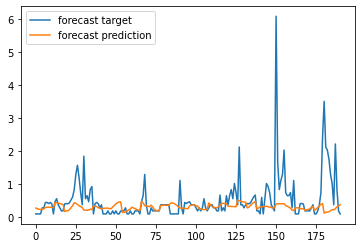

In [10]:
trainDFScaled, testDFScaled, trainDF, testDF = cargarData1()
trainXScaled, trainY, testXScaled, testY = generateFinalData(bestModel['delayedSteps'], 24, trainDFScaled, testDFScaled, trainDF, testDF)
trainXScaled, testXScaled = reshapeXdata(trainXScaled, testXScaled)
validation_target = testY[:191]
validation_predictions = saved_model.predict(testXScaled[:191,:])

fig, ax = plt.subplots(1, 1)
ax.plot(validation_target, label='forecast target')
ax.plot(validation_predictions, label='forecast prediction')
ax.legend()
